### Data cleaning and data converting

## NAN data

In [2]:
import os
import pandas as pd

In [3]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 'host_since', 
        'host_location', 'host_about', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'host_verifications', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'review_scores_cleanliness', 
        'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'license', 
        'instant_bookable', 'calculated_host_listings_count', 'reviews_per_month']

key_fields=['host_about','host_response_rate','host_total_listings_count',
            'accommodates','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating','room_type','host_is_superhost','instant_bookable']

df = pd.read_csv('listings.csv',usecols=key_fields)
df['price'] = df.price.str.replace('$','').str.replace(',','').astype(float)
df['host_response_rate'] = df.host_response_rate.str.replace('%','').astype(float)
print(df.shape)

(19896, 12)


### text data

In [4]:
def calculation(col_list,col_len,df_col,delimiter:'str'):
    col_list
    for i in df_col:
    
        if isinstance(i, str)== False:
            j=str(i)
            col_list.append(j.split(delimiter))
    
        else:
            col_list.append(i.split(delimiter))
    
    col_len
    for k in col_list:
        p=len(k)
        col_len.append(p)  

In [5]:
# for host about
host_about_list=[]
host_about_len=[]

calculation(host_about_list,host_about_len,df.host_about," ")

print(type(host_about_list))
print(host_about_list[0][0])
print(host_about_len[0])
print(host_about_list[0])

<class 'list'>
Hello
18
['Hello', 'I', 'am', 'a', 'Professional', 'designer,', 'a', 'traveler,', 'an', 'entrepreneur.', 'I', 'try', 'always', 'to', 'find', 'a', 'solution.', '']


In [6]:
# for amentities 
amenities_list=[]
amenities_len=[]

calculation(amenities_list,amenities_len,df.amenities,",")

print(type(amenities_list))
print(amenities_list[0][0])
print(amenities_len[0])
print(amenities_list[0])

<class 'list'>
["Kitchen"
13
['["Kitchen"', ' "Essentials"', ' "Cable TV"', ' "Air conditioning"', ' "Washer"', ' "Elevator"', ' "Dryer"', ' "Wifi"', ' "TV"', ' "Heating"', ' "Smoke alarm"', ' "Fire extinguisher"', ' "Carbon monoxide alarm"]']


In [7]:
df['host_about'] = host_about_len
df['amenities'] = amenities_len

In [ ]:
df.sample(4, random_state=42)[['amenities','host_about']]

### boolean data

In [8]:
bools = ['instant_bookable','host_is_superhost']
df[bools]

,instant_bookable,host_is_superhost
0,f,f
1,t,t
2,t,f
3,f,f
4,t,f
...,...,...
19891,f,f
19892,t,f
19893,f,f
19894,f,f


In [9]:
bools = ['instant_bookable','host_is_superhost']
key={'t':True,'f':False}
for b in bools:
    df[b] = df[b].replace(key).astype('bool')
df.sample(3, random_state=42)[bools]

,instant_bookable,host_is_superhost
9507,True,False
1512,False,False
17433,True,True


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 19896 non-null  int64  
 1   host_response_rate         12409 non-null  float64
 2   host_is_superhost          19896 non-null  bool   
 3   host_total_listings_count  19889 non-null  float64
 4   room_type                  19896 non-null  object 
 5   accommodates               19896 non-null  int64  
 6   amenities                  19896 non-null  int64  
 7   price                      19896 non-null  float64
 8   minimum_nights             19896 non-null  int64  
 9   number_of_reviews          19896 non-null  int64  
 10  review_scores_rating       13773 non-null  float64
 11  instant_bookable           19896 non-null  bool   
dtypes: bool(2), float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
### categorical data

In [13]:
df['room_type']=df['room_type'].astype('category')

In [14]:
# check out the new dataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19896 entries, 0 to 19895
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   host_about                 19896 non-null  int64   
 1   host_response_rate         12409 non-null  float64 
 2   host_is_superhost          19896 non-null  bool    
 3   host_total_listings_count  19889 non-null  float64 
 4   room_type                  19896 non-null  category
 5   accommodates               19896 non-null  int64   
 6   amenities                  19896 non-null  int64   
 7   price                      19896 non-null  float64 
 8   minimum_nights             19896 non-null  int64   
 9   number_of_reviews          19896 non-null  int64   
 10  review_scores_rating       13773 non-null  float64 
 11  instant_bookable           19896 non-null  bool    
dtypes: bool(2), category(1), float64(4), int64(5)
memory usage: 1.4 MB


### drop nan

In [15]:
'''df.drop(index=(df[(df.host_about.isna()) | (df.host_response_rate.isna()) 
                  | (df.host_is_superhost.isna())|(df.host_total_listings_count.isna())
                 |(df.room_type.isna())|(df.accommodates.isna())|(df.amenities.isna())
                 |(df.price.isna())|(df.minimum_nights.isna())|(df.number_of_reviews.isna())
                 |(df.instant_bookable.isna())|(df.review_scores_rating.isna())].index), inplace=True)
print(df.shape)'''
df.dropna(inplace=True)
print(df.shape)

(8874, 12)


### outlier

In [18]:
numerical=['host_about','host_response_rate','host_total_listings_count',
            'accommodates','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating']
df_o1 = df[numerical]
Q1 = df_o1.quantile(0.25)
Q3 = df_o1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df_out = df_o1[~((df_o1 < (Q1 - 1.5 * IQR)) |(df_o1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

host_about                   85.0
host_response_rate            9.0
host_total_listings_count    19.0
accommodates                  3.0
amenities                    13.0
price                        67.0
minimum_nights                4.0
number_of_reviews            66.0
review_scores_rating          9.0
dtype: float64


(4019, 9)

In [19]:
index_name=df_out.index

df.drop(index_name, inplace=True)

print(df.shape)

(4855, 12)


In [28]:
df.to_csv('data_cleaning.csv',index=False)

### eliminate multicolinearity

In [3]:
df1=pd.read_csv('data_cleaning.csv')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 4019 non-null   int64  
 1   host_response_rate         4019 non-null   float64
 2   host_is_superhost          4019 non-null   bool   
 3   host_total_listings_count  4019 non-null   float64
 4   room_type                  4019 non-null   object 
 5   accommodates               4019 non-null   int64  
 6   amenities                  4019 non-null   int64  
 7   price                      4019 non-null   float64
 8   minimum_nights             4019 non-null   int64  
 9   number_of_reviews          4019 non-null   int64  
 10  review_scores_rating       4019 non-null   float64
 11  instant_bookable           4019 non-null   bool   
dtypes: bool(2), float64(4), int64(5), object(1)
memory usage: 322.0+ KB


In [4]:
df_numeric = pd.get_dummies(df1)

df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 4019 non-null   int64  
 1   host_response_rate         4019 non-null   float64
 2   host_is_superhost          4019 non-null   bool   
 3   host_total_listings_count  4019 non-null   float64
 4   accommodates               4019 non-null   int64  
 5   amenities                  4019 non-null   int64  
 6   price                      4019 non-null   float64
 7   minimum_nights             4019 non-null   int64  
 8   number_of_reviews          4019 non-null   int64  
 9   review_scores_rating       4019 non-null   float64
 10  instant_bookable           4019 non-null   bool   
 11  room_type_Entire home/apt  4019 non-null   uint8  
 12  room_type_Hotel room       4019 non-null   uint8  
 13  room_type_Private room     4019 non-null   uint8

In [23]:
df_final = df_numeric.drop(['room_type_Entire home/apt',], axis=1)

# double check the result
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4019 entries, 0 to 4018
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 4019 non-null   int64  
 1   host_response_rate         4019 non-null   float64
 2   host_is_superhost          4019 non-null   bool   
 3   host_total_listings_count  4019 non-null   float64
 4   accommodates               4019 non-null   int64  
 5   amenities                  4019 non-null   int64  
 6   price                      4019 non-null   float64
 7   minimum_nights             4019 non-null   int64  
 8   number_of_reviews          4019 non-null   int64  
 9   review_scores_rating       4019 non-null   float64
 10  instant_bookable           4019 non-null   bool   
 11  room_type_Hotel room       4019 non-null   uint8  
 12  room_type_Private room     4019 non-null   uint8  
 13  room_type_Shared room      4019 non-null   uint8

In [5]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sn

pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

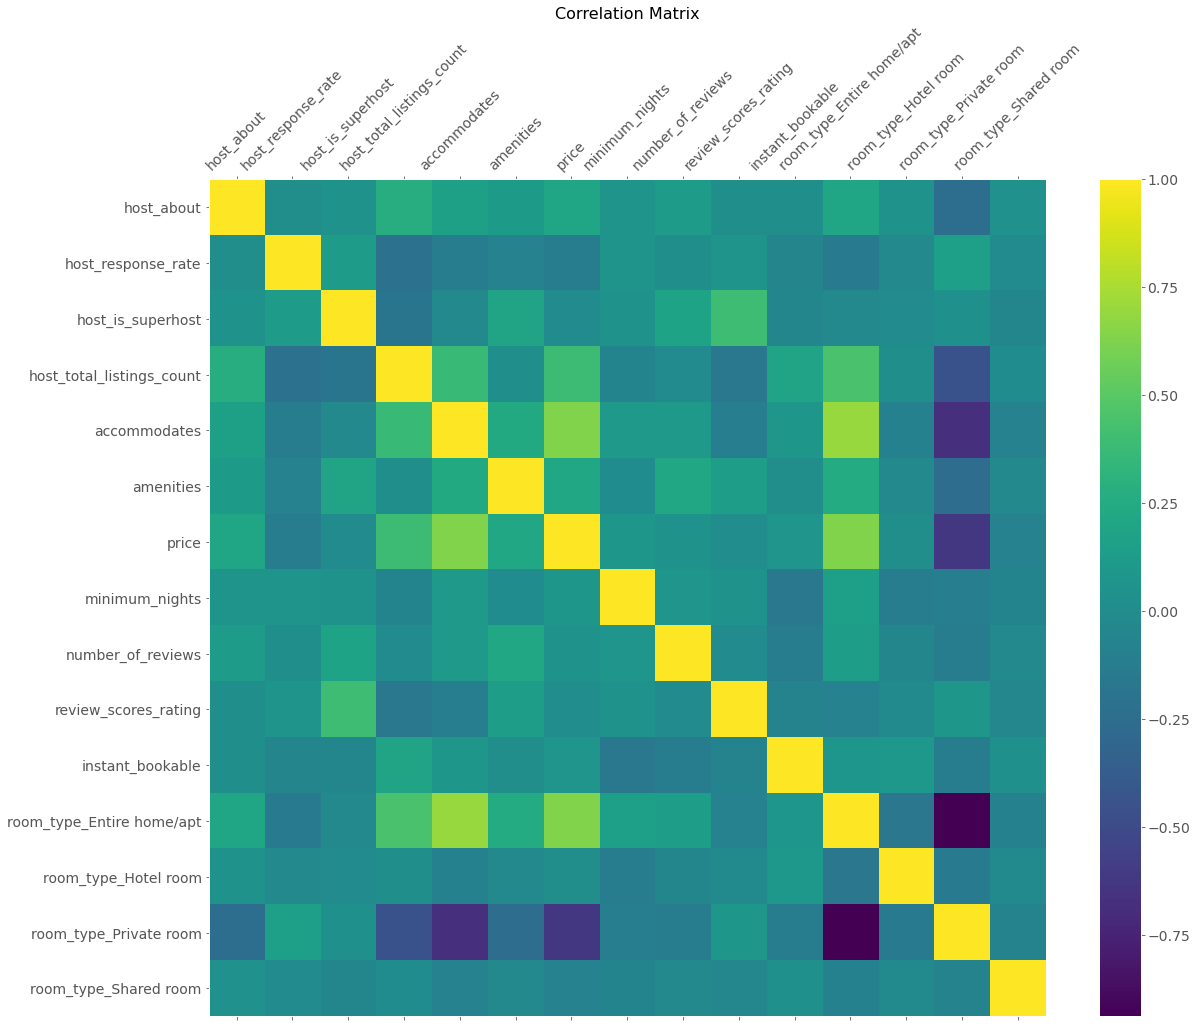

In [13]:
df2=df_numeric
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(19, 15))
plt.matshow(df2.corr(), fignum=f.number)
plt.xticks(range(df2.shape[1]), df2.columns, fontsize=14, rotation=45)
plt.yticks(range(df2.shape[1]), df2.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)
plt.savefig('Correlation_Matrix.png')


In [10]:
df_numeric.describe()

,host_about,host_response_rate,host_total_listings_count,accommodates,amenities,price,minimum_nights,number_of_reviews,review_scores_rating,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
count,"4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000","4,019.0000"
mean,40.8903,97.7701,7.8674,3.4723,22.8052,68.2307,2.1906,45.8034,92.7905,0.5158,0.0259,0.4519,0.0065
std,50.2144,5.2277,9.8288,1.9062,8.4123,44.6423,1.3953,45.1101,5.5811,0.4998,0.1588,0.4977,0.0802
min,1.0000,78.0000,0.0000,1.0000,1.0000,9.7100,1.0000,1.0000,75.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,100.0000,1.0000,2.0000,17.0000,30.0000,1.0000,8.0000,89.0000,0.0000,0.0000,0.0000,0.0000
50%,24.0000,100.0000,3.0000,3.0000,23.0000,58.0000,2.0000,30.0000,94.0000,1.0000,0.0000,0.0000,0.0000
75%,59.0000,100.0000,11.0000,5.0000,29.0000,96.5000,3.0000,73.0000,97.0000,1.0000,0.0000,1.0000,0.0000
max,213.0000,100.0000,47.0000,9.0000,48.0000,201.0000,10.0000,169.0000,100.0000,1.0000,1.0000,1.0000,1.0000


#### VIF

In [8]:
review_scores_rating = df_numeric.loc[:,['review_scores_rating', 'room_type_Hotel room', 'room_type_Entire home/apt', 'room_type_Private room', 'room_type_Shared room']]

In [9]:
# This function is partially from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features x, not the response variable y
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [10]:
room_types_new = drop_column_using_vif_(review_scores_rating.drop('review_scores_rating', axis=1))

Dropping: room_type_Hotel room
Dropping: room_type_Entire home/apt


C:\Users\Administrator\anaconda3\envs\sds2020\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Administrator\anaconda3\envs\sds2020\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [11]:
df_model=df_numeric.drop(['room_type_Entire home/apt','room_type_Hotel room'], axis=1)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 4855 non-null   int64  
 1   host_response_rate         4855 non-null   float64
 2   host_is_superhost          4855 non-null   bool   
 3   host_total_listings_count  4855 non-null   float64
 4   accommodates               4855 non-null   int64  
 5   amenities                  4855 non-null   int64  
 6   price                      4855 non-null   float64
 7   minimum_nights             4855 non-null   int64  
 8   number_of_reviews          4855 non-null   int64  
 9   review_scores_rating       4855 non-null   float64
 10  instant_bookable           4855 non-null   bool   
 11  room_type_Private room     4855 non-null   uint8  
 12  room_type_Shared room      4855 non-null   uint8  
dtypes: bool(2), float64(4), int64(5), uint8(2)
memor

In [12]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_about                 4855 non-null   int64  
 1   host_response_rate         4855 non-null   float64
 2   host_is_superhost          4855 non-null   bool   
 3   host_total_listings_count  4855 non-null   float64
 4   accommodates               4855 non-null   int64  
 5   amenities                  4855 non-null   int64  
 6   price                      4855 non-null   float64
 7   minimum_nights             4855 non-null   int64  
 8   number_of_reviews          4855 non-null   int64  
 9   review_scores_rating       4855 non-null   float64
 10  instant_bookable           4855 non-null   bool   
 11  room_type_Entire home/apt  4855 non-null   uint8  
 12  room_type_Hotel room       4855 non-null   uint8  
 13  room_type_Private room     4855 non-null   uint8

### fit the model

In [13]:
df_model.columns.values

array(['host_about', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'accommodates', 'amenities', 'price',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'room_type_Private room',
       'room_type_Shared room'], dtype=object)

In [19]:
df_model1=df_model.rename(columns={"room_type_Shared room": "room_type_Shared_room",
                         "room_type_Hotel room": "room_type_Hotel_room",
                        "room_type_Private room":"room_type_Private_room",
                        "room_type_Entire home/apt": "room_type_Entire_home/apt"})

In [18]:
df_model1.columns.values

array(['host_about', 'host_response_rate', 'host_is_superhost',
       'host_total_listings_count', 'accommodates', 'amenities', 'price',
       'minimum_nights', 'number_of_reviews', 'review_scores_rating',
       'instant_bookable', 'room_type_Private_room',
       'room_type_Shared_room'], dtype=object)

In [20]:
# Selecting model
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
# df.info()
# df.describe()
# df.columns.values
mod1 = sm.formula.ols('''review_scores_rating ~ host_about + host_response_rate +
host_total_listings_count + accommodates + amenities + price+ minimum_nights + number_of_reviews
+ host_is_superhost + room_type_Private_room + room_type_Shared_room +room_type_Hotel_room +room_type_Entire_home/apt+ instant_bookable ''', df_model1)
res = mod1.fit()

mod2 = sm.formula.ols('''review_scores_rating ~ host_about + host_response_rate +
host_total_listings_count + accommodates + amenities + price+ minimum_nights + number_of_reviews
+ host_is_superhost + instant_bookable ''', df_model1)
res2 = mod2.fit()

#model_case_annual_policies.summary()
print(res.summary())
dfoutput = summary_col([res,res2],stars=True)
print(dfoutput)


PatsyError: Error evaluating factor: NameError: name 'room_type_Entire_home' is not defined
    review_scores_rating ~ host_about + host_response_rate + host_total_listings_count + accommodates + amenities + price+ minimum_nights + number_of_reviews + host_is_superhost + room_type_Private_room + room_type_Shared_room +room_type_Hotel_room +room_type_Entire_home/apt+ instant_bookable
                                                                                                                                                                                                                                                          ^^^^^^^^^^^^^^^^^^^^^

### residual analysis

In [6]:
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols

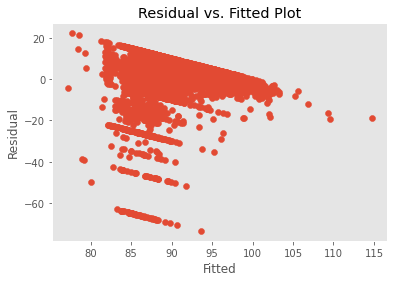

In [42]:
plt.scatter(res.fittedvalues, res.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()

In [1]:
refine_fields=['host_about','host_response_rate','amenities', 'price','minimum_nights','number_of_reviews',
            'review_scores_rating','host_is_superhost']


In [4]:
df3=pd.read_csv('data_cleaning.csv', usecols=refine_fields)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4855 entries, 0 to 4854
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   host_about            4855 non-null   int64  
 1   host_response_rate    4855 non-null   float64
 2   host_is_superhost     4855 non-null   bool   
 3   amenities             4855 non-null   int64  
 4   price                 4855 non-null   float64
 5   minimum_nights        4855 non-null   int64  
 6   number_of_reviews     4855 non-null   int64  
 7   review_scores_rating  4855 non-null   float64
dtypes: bool(1), float64(3), int64(4)
memory usage: 270.4 KB


In [8]:
# Selecting model
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
# df.info()
# df.describe()
# df.columns.values
mod3 = sm.formula.ols('''review_scores_rating ~ host_about + host_response_rate + amenities + price+ minimum_nights + number_of_reviews
+ host_is_superhost''', df3)
res3 = mod3.fit()
#model_case_annual_policies.summary()
print(res3.summary())

                             OLS Regression Results                             
Dep. Variable:     review_scores_rating   R-squared:                       0.120
Model:                              OLS   Adj. R-squared:                  0.119
Method:                   Least Squares   F-statistic:                     94.86
Date:                  Sat, 05 Dec 2020   Prob (F-statistic):          3.28e-130
Time:                          21:56:59   Log-Likelihood:                -18868.
No. Observations:                  4855   AIC:                         3.775e+04
Df Residuals:                      4847   BIC:                         3.780e+04
Df Model:                             7                                         
Covariance Type:              nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
In

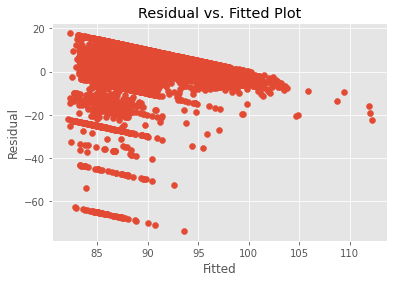

In [11]:
plt.scatter(res3.fittedvalues, res3.resid)
# adding title and labels
plt.xlabel('Fitted')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot')
plt.show()